<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Logistic Regression, Support Vector Machines & Naive Bayes*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

from IPython import display

import tqdm
from tqdm.notebook import tqdm_notebook as tqdm

In [ ]:
breast_cancer_csv = 'dat/breast-cancer-wisconsin-data.csv'

In [ ]:
breast_cancer_data = pd.read_csv(breast_cancer_csv)

### 2. EDA 

- Explore dataset. Clean data (if required)


- Define Target, Predictors
- Train-Test Split

In [ ]:
breast_cancer_data.info()

In [ ]:
breast_cancer_data.describe().T

In [ ]:
#get the last columns which is unnamed
breast_cancer_data.columns[-1]

In [ ]:
breast_cancer_data.drop(columns=breast_cancer_data.columns[-1], 
        axis=1, 
        inplace=True)

In [ ]:
breast_cancer_data.info()

In [ ]:
breast_cancer_data.duplicated().sum()

In [ ]:
breast_cancer_data.head(5)

# Target column

In [ ]:
y = breast_cancer_data.diagnosis
y.head(5)

# Predictors Column

In [ ]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in breast_cancer_data.columns if c != 'diagnosis' and c != 'id']
# Load the dataset as a pandas data frame
X = pd.DataFrame(breast_cancer_data, columns = predictor_columns)

In [ ]:
X.head(5)

# Train Test Split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression (liblinear solver)

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Evaluate Model

# Log res Accuracy score

In [ ]:
# Create Model
logres = LogisticRegression(max_iter=2000)

# Fit Model
logres.fit(X_train, y_train)
print('Training set score: ', logres.score(X_train, y_train))
print('Test set score: ', logres.score(X_test, y_test))

In [ ]:
# predicted labels (class):
y_pred = logres.predict(X_test)
print('y_pred: ', y_pred)

# Log res Confusion matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['predicted_healthy','predicted_cancer']).rename(index={0: 'is_healthy', 1: 'is_cancer'})
print(confusion_matrix_df)

# Log res Classification report

The traditional F-measure or balanced F-score (F1 score) is the balance between of precision and recall:

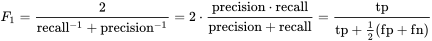

In [ ]:
classification_report = metrics.classification_report(y_test, y_pred)

print(classification_report)

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine (linear)

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Evaluate Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#svc = svm.SVC(C=1000, kernel='linear', random_state=1)
svc = make_pipeline(StandardScaler(), svm.SVC(C=1000, kernel='linear'))

In [ ]:
# fit the model (linear kernal), without regularisation (make C large):
svc.fit(X_train, y_train)

## SVM accuracy score

In [ ]:
print('Training set score: ', svc.score(X_train, y_train))
print('Test set score: ', svc.score(X_test, y_test))

In [ ]:
# predicted labels (class):
y_pred = svc.predict(X_test)
print('y_pred: ', y_pred)

## SVM confusion matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['predicted_healthy','predicted_cancer']).rename(index={0: 'is_healthy', 1: 'is_cancer'})
print(confusion_matrix_df)

## SVM classification report

In [ ]:
classification_report = metrics.classification_report(y_test, y_pred)

print(classification_report)

### 5. Naive Bayes
#### 5.1 Use Naive Bayes (Gaussian classifier)

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Evaluate Model

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

## GNB accuracy score

In [ ]:
print('Training set score: ', gnb.score(X_train, y_train))
print('Test set score: ', gnb.score(X_test, y_test))

In [ ]:
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

## GNB confusion matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['predicted_healthy','predicted_cancer']).rename(index={0: 'is_healthy', 1: 'is_cancer'})
print(confusion_matrix_df)

## GNB classification report

In [ ]:
classification_report = metrics.classification_report(y_test, y_pred)

print(classification_report)

### 6. Gridsearch optimal parameters for models.

Is there any difference between accuracy score of Logistic Regression, SVM and Naive Bayes? Use grid search to find optimal parameters for Logistic Regression and SVM models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [ ]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100],
    'solver': ['saga'],
    'max_iter': [5000]
}

In [ ]:
logres = LogisticRegression()
lr_clf = GridSearchCV(logres, lr_params, return_train_score=True, n_jobs=-1, verbose=9)
lr_clf.fit(X, y)

In [ ]:
print(lr_clf.best_params_)
print(lr_clf.best_score_)

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [ ]:
svc_params = {
    'C': [1, 10, 100, 1000],
    'gamma': ['scale' , 'auto', 0.001, 0.0001],
    'kernel': ['linear','rbf'],
    'probability': [True]
}

In [ ]:
svc = svm.SVC()
svc_clf = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs=-1, verbose=9)
svc_clf.fit(X, y)

In [ ]:
print(svc_clf.best_params_)
print(svc_clf.best_score_)

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [ ]:
yhat_pp_lr = lr_clf.predict_proba(X_test)
yhat_pp_svm = svc_clf.predict_proba(X_test)
yhat_pp_gnb = gnb.predict_proba(X_test)

In [ ]:
print(np.shape(yhat_pp_lr))
print(np.shape(yhat_pp_svm))
print(np.shape(yhat_pp_gnb))
print(np.shape(y_test))

In [ ]:
# For class 1, find the area under the curve
# Find fpr, tpr
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_pp_df.iloc[:,1], pos_label='M')
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_pp_df.iloc[:,1], pos_label='M')
fpr_gnb, tpr_gnb, _ = metrics.roc_curve(y_test, gnb_pp_df.iloc[:,1], pos_label='M')

# Find auc
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw = lw, label = 'ROC curve for log res (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='red', lw = lw, label = 'ROC curve for SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw = lw, label = 'ROC curve for Naive Bayes (area = %0.2f)' % roc_auc_gnb)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



